In [1]:
import numpy as np
import pandas as pd

In [2]:
import statsmodels.api as sm

# firstly we will analyze our data we have 3 types of investments oil,gold and other share investments,let's plot them

In [3]:
df=pd.read_csv('company_stock_investment.csv')

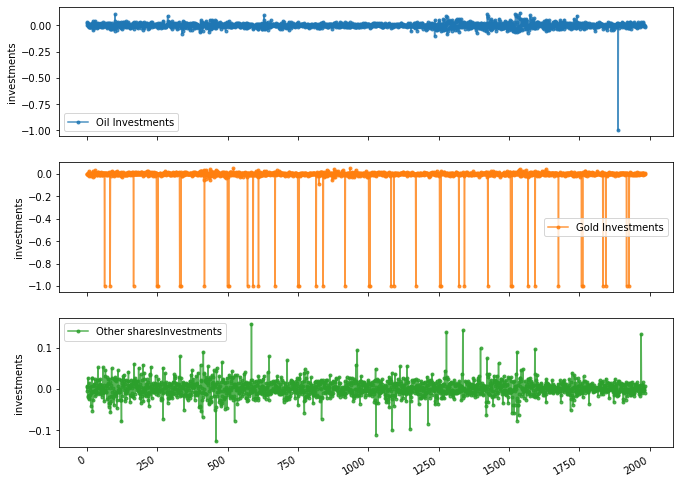

In [4]:
cols_plot = ['Oil Investments', 'Gold Investments', 'Other sharesInvestments']
axes = df[cols_plot].plot(marker='.', alpha=0.8, linestyle='solid', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('investments')

In [5]:
#each investment follows a different trend

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [7]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

# let's see which month and day was for particular date to the corresponding investment

In [8]:
df.reset_index().head()
df.loc['2016-01-20':'2016-01-22']

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments,Year,Month,Weekday Name
Date,,,,,,,
2016-01-20,-0.062873,0.014269,0.001345,-0.004717,2016,1,Wednesday
2016-01-21,0.107571,-0.004765,-0.005062,0.005684,2016,1,Thursday
2016-01-22,0.085279,-0.000228,0.053167,0.037147,2016,1,Friday


In [9]:
# having a look at particular month of a year

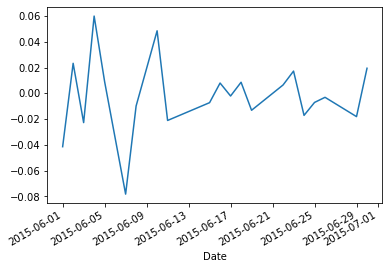

In [10]:
mplot = df.loc['2015-06', 'Oil Investments'].plot()

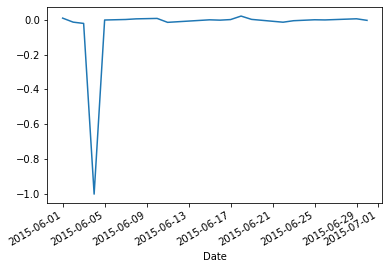

In [11]:
mplot = df.loc['2015-06', 'Gold Investments'].plot()


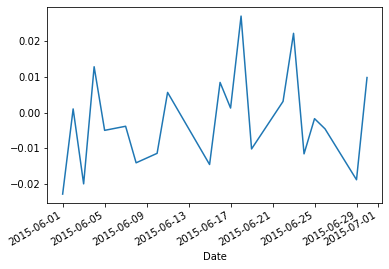

In [12]:
mplot = df.loc['2015-06', 'Other sharesInvestments'].plot()

# now i'll make 3 different dataframes for oil,gold and other share investments to build the 3 models 

In [13]:
#starting with oil investments

In [14]:
df_oil=pd.read_csv('company_stock_investment.csv')
df_oil.drop(["Gold Investments","Comp Stock","Other sharesInvestments"],inplace=True,axis=1)
df_oil.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


In [15]:
df_oil['Date']=pd.to_datetime(df_oil['Date'])
df_oil.set_index('Date',inplace=True)

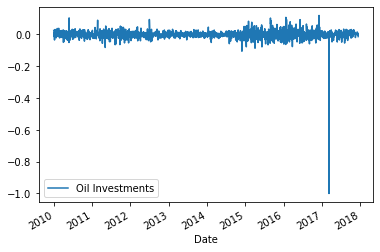

In [16]:
df_oil.plot()

Text(0, 0.5, 'oil investment')

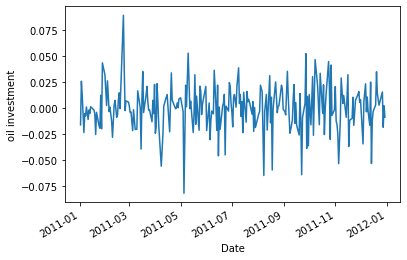

In [17]:
ax = df_oil.loc['2011', 'Oil Investments'].plot()
ax.set_ylabel('oil investment')

Text(0, 0.5, 'oil investment')

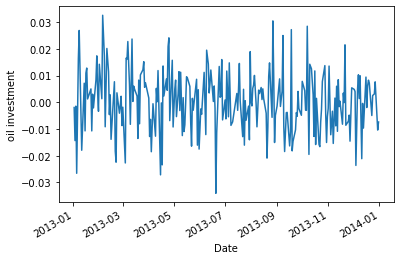

In [18]:
ax = df_oil.loc['2013', 'Oil Investments'].plot()
ax.set_ylabel('oil investment')

Text(0, 0.5, 'oil investment')

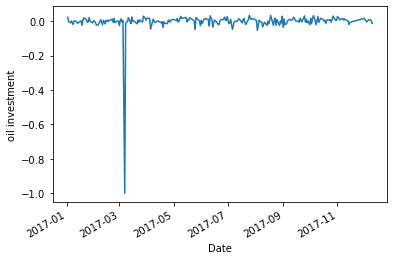

In [19]:
ax = df_oil.loc['2017', 'Oil Investments'].plot()
ax.set_ylabel('oil investment')

In [20]:
#apart from year 2017 there can be seen a similar trend for all the years

In [21]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(investment):
    result=adfuller(investment) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [22]:
adfuller_test(df_oil['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [23]:
df_oil.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df_oil['Oil Investments'],order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored wh

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3668.303
Method:                       css-mle   S.D. of innovations              0.038
Date:                Sat, 24 Oct 2020   AIC                          -7330.606
Time:                        13:03:29   BIC                          -7313.828
Sample:                             1   HQIC                         -7324.443
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.871e-05      0.001     -0.033      0.974      -0.001       0.001
ar.L1.D.Oil Investments    -0.5130      0.019    -26.631      0.000      -0.551      -0.475
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9492           +0.0000j            1.9492            0.5000
-----------------------------------------------------------------------------
"""

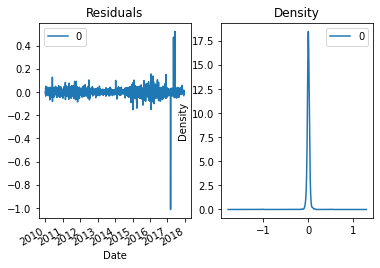

In [27]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

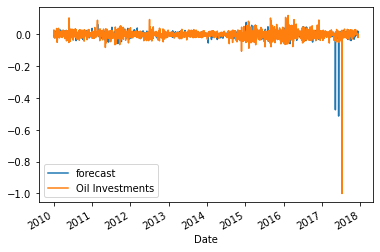

In [28]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [29]:
df_oil['Oil Investments'][1511]

-0.008618368000000001

# splitting my dataset in such a way that train consists of data till 2015 and test and validation covers 2016,17

In [31]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_oil['Oil Investments'][:1512]
validation=df_oil['Oil Investments'][1600:1750]
test = df_oil['Oil Investments'][1751:1901]



C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored wh

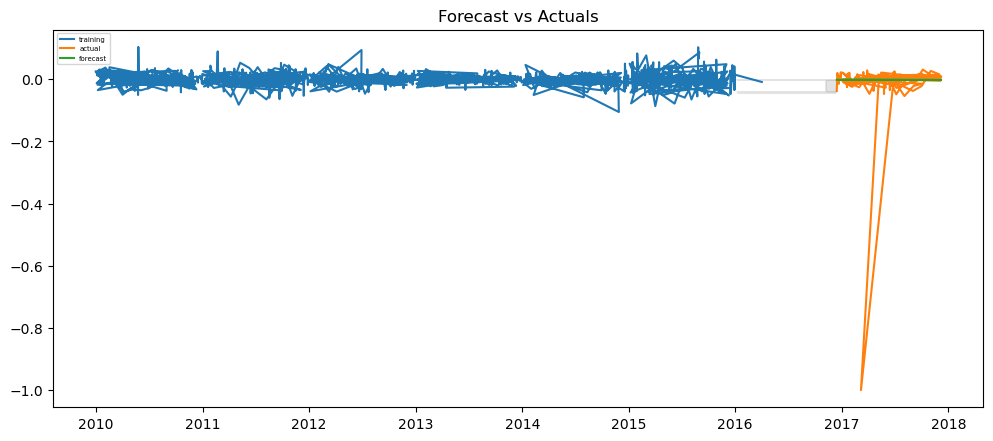

In [32]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(150, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=validation.index)



# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series,
                 color='k', alpha=.11)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=5)
plt.show()


In [33]:
#we can see a constant prediction which is not fully correct but atleast the forecast is  somewhat close to the actual

In [34]:
#let's try with another order

C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored wh

                             ARIMA Model Results                              
Dep. Variable:      D.Oil Investments   No. Observations:                 1511
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3483.489
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sat, 24 Oct 2020   AIC                          -6960.979
Time:                        13:03:34   BIC                          -6945.017
Sample:                             1   HQIC                         -6955.035
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.738e-05      0.000     -0.043      0.965      -0.001       0.001
ar.L1.D.Oil Investments    -0.5491      0.021    -25.553      0.000      -0.591      -0.507


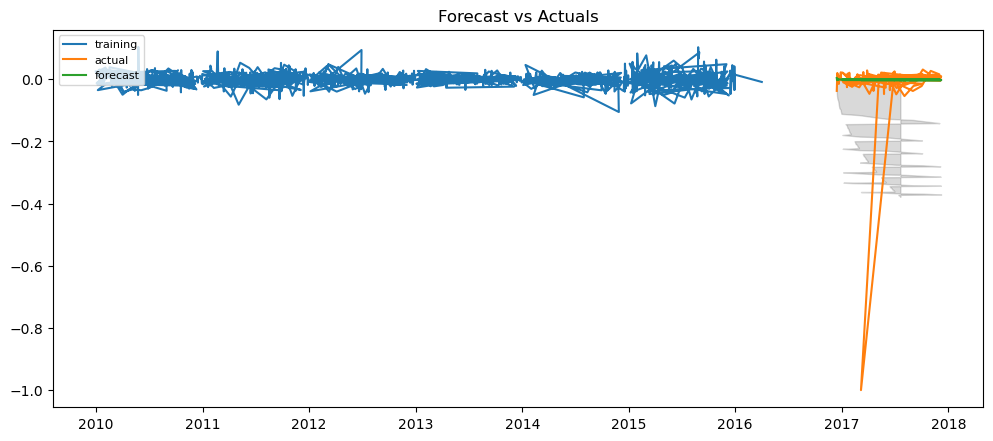

In [35]:
model = ARIMA(train, order=(1,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(150, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)



# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
#lets have a look at some metrics

In [37]:
def forecast_accuracy(forecast, actual):
    
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
      
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
                 # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({ 'me':me, 'mae': mae, 
             'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

forecast_accuracy(fc, test.values)



C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'me': 0.005610661866805211,
 'mae': 0.019017953024959417,
 'rmse': 0.08301458488547142,
 'acf1': -0.032275807199056525,
 'corr': 0.08401662769633479}

In [38]:
import pmdarima as pm
smodel = pm.auto_arima(df_oil, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=20.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-6740.936, Time=1.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-7314.987, Time=5.75 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=13.06 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-6742.936, Time=0.22 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6742.824, Time=1.63 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-7537.694, Time=16.95 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=47.72 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.41 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-7538.232, Time=9.11 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-7315.006, Time=3.59 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=33.10 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.77 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-7537.757, Time=11.81 sec
 ARIMA(1,0,1)(2,1,0)[12] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1984
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                3773.107
Date:                  Sat, 24 Oct 2020   AIC                          -7540.215
Time:                          13:08:19   BIC                          -7523.454
Sample:                               0   HQIC                         -7534.056
                                 - 1984                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6713      0.003   -213.971      0.000      -0.677      -0.665
ar.S.L24      -0.3300      0.003   -109.534      0.000      -0.336      -0.324
sigma2         0.0013   3.16e-06    401.851      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      221.51   Jarque-Bera (JB):           8796483.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.77   Skew:                            -9.83
Prob(H) (two-sided):                  0.00   Kurtosis:                       329.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:

#now we will build and forecast the future results for 2018,19,20,21

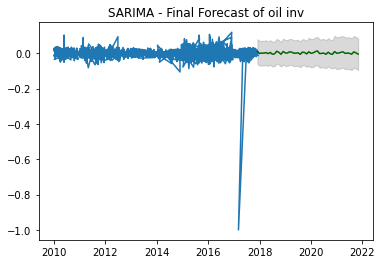

In [50]:
n_periods = 48
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_oil.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_oil)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of oil inv")
plt.show()


# we can also have a look at these forecast values(for oil) (upper series have stored in the positive values,whereas the lower series indicate the negative values)

In [51]:
upper_series

2017-12-01    0.080448
2018-01-01    0.069201
2018-02-01    0.071658
2018-03-01    0.070674
2018-04-01    0.074023
2018-05-01    0.068405
2018-06-01    0.074820
2018-07-01    0.065121
2018-08-01    0.066846
2018-09-01    0.081873
2018-10-01    0.075743
2018-11-01    0.064342
2018-12-01    0.083956
2019-01-01    0.075844
2019-02-01    0.075652
2019-03-01    0.081722
2019-04-01    0.080591
2019-05-01    0.074369
2019-06-01    0.074764
2019-07-01    0.076643
2019-08-01    0.067905
2019-09-01    0.080415
2019-10-01    0.078382
2019-11-01    0.070510
2019-12-01    0.088528
2020-01-01    0.080256
2020-02-01    0.082671
2020-03-01    0.089468
2020-04-01    0.093850
2020-05-01    0.078879
2020-06-01    0.079926
2020-07-01    0.081344
2020-08-01    0.074718
2020-09-01    0.086442
2020-10-01    0.077170
2020-11-01    0.074775
2020-12-01    0.099823
2021-01-01    0.090624
2021-02-01    0.092163
2021-03-01    0.096144
2021-04-01    0.098304
2021-05-01    0.089405
2021-06-01    0.092002
2021-07-01 

In [52]:
lower_series

2017-12-01   -0.059314
2018-01-01   -0.070561
2018-02-01   -0.068104
2018-03-01   -0.069088
2018-04-01   -0.065740
2018-05-01   -0.071358
2018-06-01   -0.064942
2018-07-01   -0.074641
2018-08-01   -0.072916
2018-09-01   -0.057889
2018-10-01   -0.064019
2018-11-01   -0.075420
2018-12-01   -0.063162
2019-01-01   -0.071274
2019-02-01   -0.071466
2019-03-01   -0.065396
2019-04-01   -0.066526
2019-05-01   -0.072749
2019-06-01   -0.072354
2019-07-01   -0.070474
2019-08-01   -0.079212
2019-09-01   -0.066703
2019-10-01   -0.068736
2019-11-01   -0.076607
2019-12-01   -0.071431
2020-01-01   -0.079704
2020-02-01   -0.077288
2020-03-01   -0.070492
2020-04-01   -0.066110
2020-05-01   -0.081081
2020-06-01   -0.080033
2020-07-01   -0.078616
2020-08-01   -0.085241
2020-09-01   -0.073517
2020-10-01   -0.082789
2020-11-01   -0.085184
2020-12-01   -0.080132
2021-01-01   -0.089332
2021-02-01   -0.087792
2021-03-01   -0.083812
2021-04-01   -0.081652
2021-05-01   -0.090551
2021-06-01   -0.087954
2021-07-01 

In [53]:
#now moving forward with gold investment applying the same steps

# gold investment

In [54]:
df_gold=pd.read_csv('company_stock_investment.csv')
df_gold.drop(["Oil Investments","Comp Stock","Other sharesInvestments"],inplace=True,axis=1)
df_gold.head()

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221


In [55]:
df_gold['Date']=pd.to_datetime(df_gold['Date'])
df_gold.set_index('Date',inplace=True)

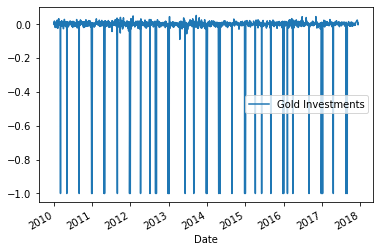

In [56]:
df_gold.plot()

Text(0, 0.5, 'gold investment')

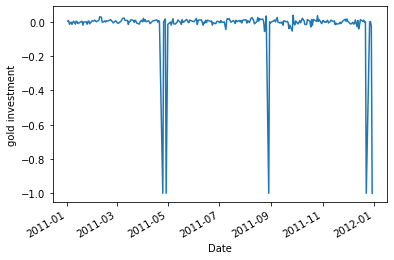

In [57]:
ax = df_gold.loc['2011', 'Gold Investments'].plot()
ax.set_ylabel('gold investment')

Text(0, 0.5, 'gold investment')

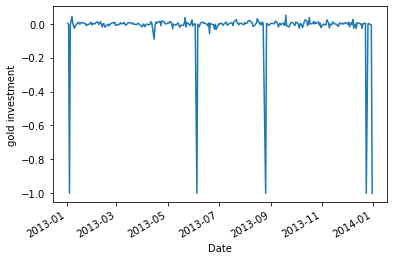

In [58]:
ax = df_gold.loc['2013', 'Gold Investments'].plot()
ax.set_ylabel('gold investment')

Text(0, 0.5, 'gold investment')

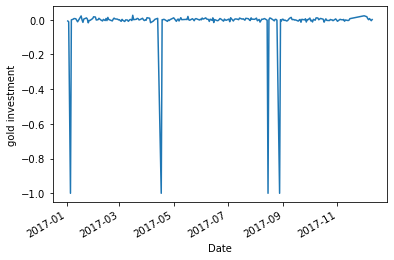

In [59]:
ax = df_gold.loc['2017', 'Gold Investments'].plot()
ax.set_ylabel('gold investment')

In [60]:
#here also for all the years a similar trend can be seen

In [61]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(investment):
    result=adfuller(investment) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [62]:
adfuller_test(df_gold['Gold Investments'])

ADF Test Statistic : -15.906853851669053
p-value : 8.208405770368892e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [63]:
df_gold.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


In [64]:
model_2=ARIMA(df_gold['Gold Investments'],order=(1,1,0)) # this order is p d q(0 or 1) 
model_2_fit=model.fit()

C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored wh

In [65]:
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1511
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3483.489
Method:                       css-mle   S.D. of innovations              0.024
Date:                Sat, 24 Oct 2020   AIC                          -6960.979
Time:                        13:25:38   BIC                          -6945.017
Sample:                             1   HQIC                         -6955.035
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.738e-05      0.000     -0.043      0.965      -0.001       0.001
ar.L1.D.Oil Investments    -0.5491      0.021    -25.553      0.000      -0.591      -0.507
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8212           +0.0000j            1.8212            0.5000
-----------------------------------------------------------------------------
"""

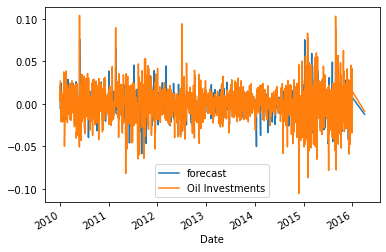

In [66]:
model_2_fit.plot_predict(dynamic=False)
plt.show()

In [67]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_gold['Gold Investments'][:1550]
validation=df_gold['Gold Investments'][1514:1734]
test = df_gold['Gold Investments'][1735:1955]



C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored wh

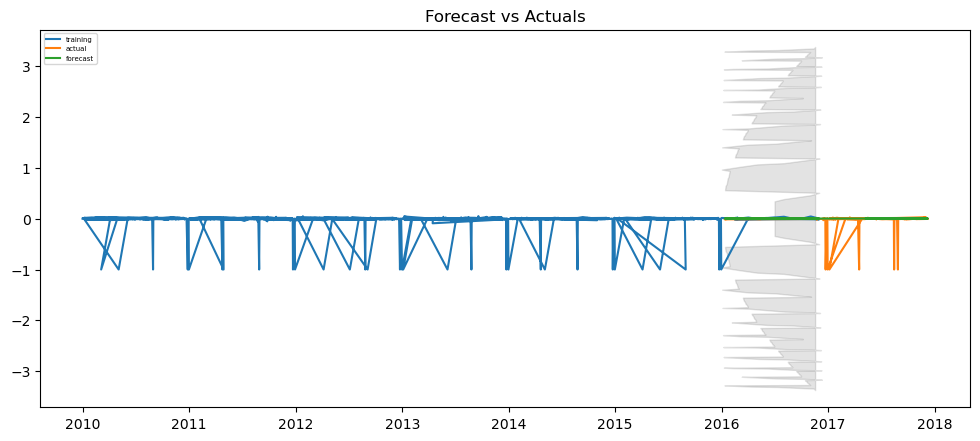

In [69]:
model_2 = ARIMA(train, order=(1, 1, 0))  
fitted = model_2.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(220, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=validation.index)
upper_series = pd.Series(conf[:, 1], index=validation.index)



# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series,upper_series,
                 color='k', alpha=.11)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=5)
plt.show()


In [ ]:
#again a almost close we can see the forecast and actual coincides but again it's a constant line and doesn't cobver the downward trend 

In [70]:
import pmdarima as pm
smodel = pm.auto_arima(df_gold, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=1, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=15.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=660.055, Time=0.53 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-445.527, Time=1.84 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=121.261, Time=0.36 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-682.831, Time=3.80 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=58.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=11.24 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-110.868, Time=2.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-916.073, Time=4.80 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-687.034, Time=3.73 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=52.02 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=14.36 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-1242.415, Time=12.14 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1984
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 627.207
Date:                            Sat, 24 Oct 2020   AIC                          -1242.415
Time:                                    13:32:49   BIC                          -1208.897
Sample:                                         0   HQIC                         -1230.098
                                           - 1984                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8020      0.018    -43.383      0.000      -0.838      -0.766
ar.L2         -0.5982      0.019    -31.861      0.000      -0.635      -0.561
ar.L3         -0.3925      0.010    -39.032      0.000      -0.412      -0.373
ar.S.L12      -0.6514      0.012    -53.863      0.000      -0.675      -0.628
ar.S.L24      -0.3405      0.013    -27.057      0.000      -0.365      -0.316
sigma2         0.0309      0.000     95.895      0.000       0.030       0.032
===================================================================================
Ljung-Box (Q):                      367.88   Jarque-Bera (JB):             25249.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -2.57
Prob(H) (two-sided):                  0.90   Kurtosis:                        19.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

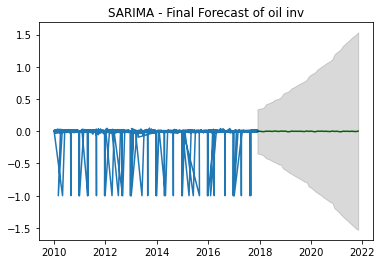

In [73]:
n_periods = 48
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_gold.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_gold)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of oil inv")
plt.show()

# lets have a look at the forecast values(for gold)

In [74]:
lower_series

2017-12-01   -0.348065
2018-01-01   -0.350965
2018-02-01   -0.364925
2018-03-01   -0.381548
2018-04-01   -0.417642
2018-05-01   -0.431195
2018-06-01   -0.444609
2018-07-01   -0.464395
2018-08-01   -0.478840
2018-09-01   -0.495237
2018-10-01   -0.513965
2018-11-01   -0.521824
2018-12-01   -0.580540
2019-01-01   -0.596243
2019-02-01   -0.623541
2019-03-01   -0.644454
2019-04-01   -0.662695
2019-05-01   -0.684432
2019-06-01   -0.702488
2019-07-01   -0.722805
2019-08-01   -0.742013
2019-09-01   -0.762088
2019-10-01   -0.782253
2019-11-01   -0.791358
2019-12-01   -0.858247
2020-01-01   -0.875909
2020-02-01   -0.904371
2020-03-01   -0.933448
2020-04-01   -0.956115
2020-05-01   -0.980156
2020-06-01   -1.001802
2020-07-01   -1.028878
2020-08-01   -1.051624
2020-09-01   -1.076818
2020-10-01   -1.100182
2020-11-01   -1.113964
2020-12-01   -1.199533
2021-01-01   -1.223928
2021-02-01   -1.259135
2021-03-01   -1.292976
2021-04-01   -1.326215
2021-05-01   -1.357409
2021-06-01   -1.386235
2021-07-01 

In [75]:
upper_series

2017-12-01    0.340652
2018-01-01    0.351122
2018-02-01    0.356830
2018-03-01    0.368112
2018-04-01    0.419499
2018-05-01    0.430210
2018-06-01    0.445315
2018-07-01    0.457796
2018-08-01    0.485333
2018-09-01    0.496141
2018-10-01    0.506163
2018-11-01    0.527880
2018-12-01    0.580434
2019-01-01    0.600070
2019-02-01    0.610670
2019-03-01    0.630082
2019-04-01    0.666957
2019-05-01    0.682150
2019-06-01    0.702033
2019-07-01    0.720256
2019-08-01    0.741782
2019-09-01    0.757189
2019-10-01    0.772538
2019-11-01    0.798693
2019-12-01    0.853443
2020-01-01    0.879523
2020-02-01    0.897048
2020-03-01    0.916404
2020-04-01    0.958697
2020-05-01    0.980105
2020-06-01    1.004880
2020-07-01    1.024894
2020-08-01    1.051829
2020-09-01    1.070556
2020-10-01    1.091117
2020-11-01    1.120996
2020-12-01    1.193833
2021-01-01    1.224962
2021-02-01    1.248356
2021-03-01    1.276523
2021-04-01    1.327604
2021-05-01    1.354878
2021-06-01    1.385939
2021-07-01 

# now the last target variable other share investments

In [76]:
df_othershares=pd.read_csv('company_stock_investment.csv')
df_othershares.drop(["Gold Investments","Comp Stock","Oil Investments"],inplace=True,axis=1)
df_othershares.head()

,Date,Other sharesInvestments
0,31-12-2009,0.006848
1,04-01-2010,-0.004609
2,05-01-2010,0.005900
3,06-01-2010,-0.018116
4,07-01-2010,-0.017013


In [77]:
df_othershares['Date']=pd.to_datetime(df_othershares['Date'])
df_othershares.set_index('Date',inplace=True)

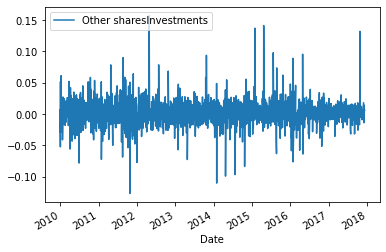

In [78]:
df_othershares.plot()

Text(0, 0.5, 'other share investment')

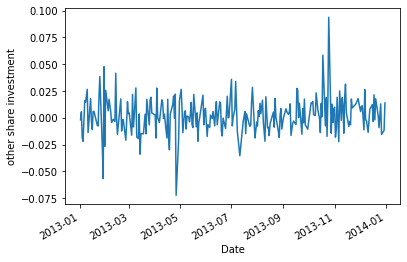

In [79]:
ax = df_othershares.loc['2013','Other sharesInvestments'].plot()
ax.set_ylabel('other share investment')

Text(0, 0.5, 'other share investment')

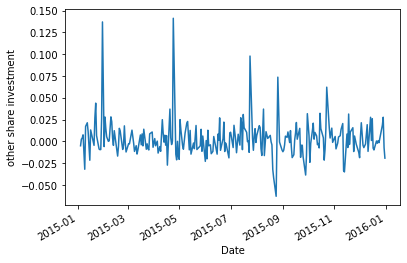

In [80]:
ax = df_othershares.loc['2015','Other sharesInvestments'].plot()
ax.set_ylabel('other share investment')

Text(0, 0.5, 'other share investment')

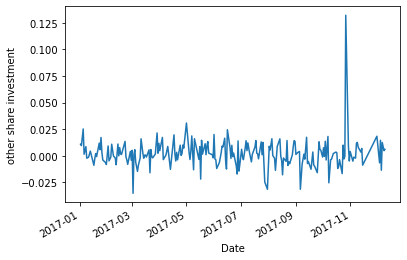

In [81]:
ax = df_othershares.loc['2017','Other sharesInvestments'].plot()
ax.set_ylabel('other share investment')

In [82]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(investment):
    result=adfuller(investment) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [83]:
adfuller_test(df_othershares['Other sharesInvestments'])


ADF Test Statistic : -44.84814456404393
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [84]:
df_othershares.describe()

,Other sharesInvestments
count,1984.000000
mean,0.001269
std,0.019733
min,-0.126568
25%,-0.008492
50%,0.000840
75%,0.011632
max,0.157457


In [85]:
model=ARIMA(df_othershares['Other sharesInvestments'],order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored wh

In [86]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Other sharesInvestments   No. Observations:                 1983
Model:                        ARIMA(1, 1, 0)   Log Likelihood                4549.068
Method:                              css-mle   S.D. of innovations              0.024
Date:                       Sat, 24 Oct 2020   AIC                          -9092.136
Time:                               13:36:15   BIC                          -9075.359
Sample:                                    1   HQIC                         -9085.973
                                                                                     
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -3.44e-06      0.000     -0.009      0.993      -0.001       0.001
ar.L1.D.Other sharesInvestments    -0.4908      0.020    -25.096      0.000      -0.529      -0.452
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0375           +0.0000j            2.0375            0.5000
-----------------------------------------------------------------------------
"""

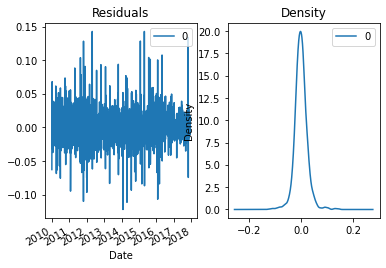

In [87]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

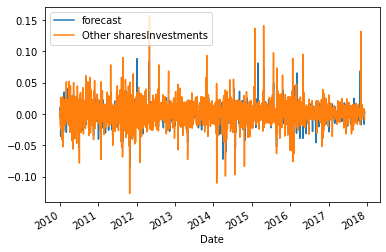

In [88]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [99]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_othershares['Other sharesInvestments'][:1513]
validation=df_othershares['Other sharesInvestments'][1600:1750]
test = df_othershares['Other sharesInvestments'][1751:1901]



C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored wh

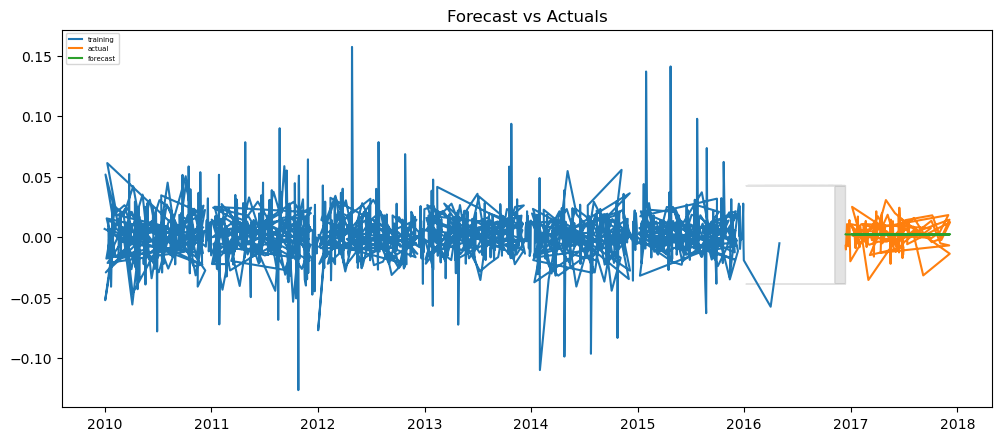

In [101]:
model_3 = ARIMA(train, order=(1,1,1))  
fitted = model_3.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(150, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=validation.index)
upper_series = pd.Series(conf[:, 1], index=validation.index)




# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index,lower_series,upper_series,
                 color='k', alpha=.11)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=5)
plt.show()

In [102]:
fc_series

Date
2016-12-14    0.002359
2016-12-15    0.002261
2016-12-16    0.002263
2016-12-19    0.002264
2016-12-20    0.002265
                ...   
2017-07-14    0.002424
2017-07-17    0.002425
2017-07-18    0.002426
2017-07-19    0.002427
2017-07-20    0.002428
Length: 150, dtype: float64

In [103]:
def forecast_accuracy(forecast, actual):
    
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
      
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
                 # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({ 'me':me, 'mae': mae, 
             'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

forecast_accuracy(fc, test.values)


C:\Users\COMP\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'me': 0.00039813111633305595,
 'mae': 0.00767016583350156,
 'rmse': 0.01015914598296519,
 'acf1': 0.017213606671482896,
 'corr': -0.0012152301509107005}

In [104]:
import pmdarima as pm
smodel = pm.auto_arima(df_othershares, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=26.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-8450.439, Time=1.18 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-9088.991, Time=8.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-8452.436, Time=0.45 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-8448.479, Time=0.58 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-9338.785, Time=19.65 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=73.12 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=16.62 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-9340.653, Time=8.38 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-9090.326, Time=2.05 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.35 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=23.23 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-9338.790, Time=17.10 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1984
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                4674.302
Date:                  Sat, 24 Oct 2020   AIC                          -9342.604
Time:                          13:47:13   BIC                          -9325.843
Sample:                               0   HQIC                         -9336.445
                                 - 1984                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7095      0.016    -43.772      0.000      -0.741      -0.678
ar.S.L24      -0.3493      0.017    -20.811      0.000      -0.382      -0.316
sigma2         0.0005   8.65e-06     58.864      0.000       0.000       0.001
===================================================================================
Ljung-Box (Q):                      185.66   Jarque-Bera (JB):              2103.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

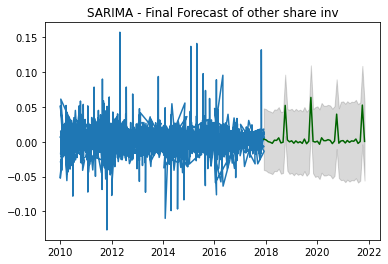

In [105]:
n_periods = 48
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_othershares.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df_othershares)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of other share inv")
plt.show()

# forecast values for other share investment

In [106]:
lower_series

2017-12-01   -0.040400
2018-01-01   -0.041401
2018-02-01   -0.043917
2018-03-01   -0.044732
2018-04-01   -0.046379
2018-05-01   -0.041885
2018-06-01   -0.042236
2018-07-01   -0.038508
2018-08-01   -0.045811
2018-09-01   -0.044760
2018-10-01    0.008101
2018-11-01   -0.041506
2018-12-01   -0.046053
2019-01-01   -0.044576
2019-02-01   -0.048089
2019-03-01   -0.044685
2019-04-01   -0.047390
2019-05-01   -0.045883
2019-06-01   -0.048271
2019-07-01   -0.042120
2019-08-01   -0.048797
2019-09-01   -0.045165
2019-10-01    0.017754
2019-11-01   -0.045344
2019-12-01   -0.050452
2020-01-01   -0.049138
2020-02-01   -0.053553
2020-03-01   -0.044316
2020-04-01   -0.048396
2020-05-01   -0.048404
2020-06-01   -0.046987
2020-07-01   -0.048033
2020-08-01   -0.052616
2020-09-01   -0.048828
2020-10-01   -0.010322
2020-11-01   -0.052012
2020-12-01   -0.055100
2021-01-01   -0.054536
2021-02-01   -0.057963
2021-03-01   -0.054338
2021-04-01   -0.057073
2021-05-01   -0.054963
2021-06-01   -0.055533
2021-07-01 

In [107]:
upper_series

2017-12-01    0.048066
2018-01-01    0.047065
2018-02-01    0.044549
2018-03-01    0.043734
2018-04-01    0.042086
2018-05-01    0.046580
2018-06-01    0.046230
2018-07-01    0.049958
2018-08-01    0.042654
2018-09-01    0.043706
2018-10-01    0.096566
2018-11-01    0.046959
2018-12-01    0.046071
2019-01-01    0.047548
2019-02-01    0.044035
2019-03-01    0.047439
2019-04-01    0.044734
2019-05-01    0.046241
2019-06-01    0.043853
2019-07-01    0.050003
2019-08-01    0.043327
2019-09-01    0.046959
2019-10-01    0.109878
2019-11-01    0.046779
2019-12-01    0.049716
2020-01-01    0.051030
2020-02-01    0.046615
2020-03-01    0.055852
2020-04-01    0.051772
2020-05-01    0.051764
2020-06-01    0.053181
2020-07-01    0.052135
2020-08-01    0.047552
2020-09-01    0.051340
2020-10-01    0.089846
2020-11-01    0.048156
2020-12-01    0.057570
2021-01-01    0.058134
2021-02-01    0.054708
2021-03-01    0.058333
2021-04-01    0.055598
2021-05-01    0.057708
2021-06-01    0.057137
2021-07-01 

In [ ]:
#apart from gold and oil,others share investments predicted a seasonal  trend 
#as the values are so close lying between -1 to 1 major values lies from 0 to 0.10 range
#thereby predicted line may not  show a downward trend but when we observe the values in my series i observe negative values too